In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
train_path = 'data/signs/train'
test_path = 'data/signs/test'
valid_path = 'data/signs/valid'

In [24]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 3635 images belonging to 36 classes.
Found 1080 images belonging to 36 classes.
Found 180 images belonging to 36 classes.


### Model1 with all the 3 rgb channels

In [16]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [17]:
x = mobile.layers[-6].output

In [18]:
output = Dense(units=36, activation='softmax')(x)

In [19]:
model = Model(inputs=mobile.inputs, outputs=output)

In [20]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [21]:
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 36)                7225380   
Total params: 7,244,196
Trainable params: 7,244,196
Non-trainable params: 0
____________________________________________

In [25]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

Epoch 1/30
364/364 - 152s - loss: 1.4938 - accuracy: 0.6308 - val_loss: 3.2433 - val_accuracy: 0.4194
Epoch 2/30
364/364 - 165s - loss: 0.3178 - accuracy: 0.8974 - val_loss: 1.5720 - val_accuracy: 0.6565
Epoch 3/30
364/364 - 155s - loss: 0.1944 - accuracy: 0.9381 - val_loss: 0.2538 - val_accuracy: 0.9241
Epoch 4/30
364/364 - 264s - loss: 0.1510 - accuracy: 0.9538 - val_loss: 0.6611 - val_accuracy: 0.8222
Epoch 5/30
364/364 - 211s - loss: 0.0964 - accuracy: 0.9697 - val_loss: 1.2388 - val_accuracy: 0.7602
Epoch 6/30
364/364 - 158s - loss: 0.1699 - accuracy: 0.9538 - val_loss: 0.3688 - val_accuracy: 0.9000
Epoch 7/30
364/364 - 258s - loss: 0.1274 - accuracy: 0.9659 - val_loss: 0.2244 - val_accuracy: 0.9407
Epoch 8/30
364/364 - 166s - loss: 0.0820 - accuracy: 0.9766 - val_loss: 1.3336 - val_accuracy: 0.7537
Epoch 9/30
364/364 - 165s - loss: 0.0789 - accuracy: 0.9755 - val_loss: 0.3251 - val_accuracy: 0.9167
Epoch 10/30
364/364 - 166s - loss: 0.0946 - accuracy: 0.9730 - val_loss: 1.5705 - 

In [26]:
test_batches.classes

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30,
       30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 35, 35, 35, 35, 35])

In [28]:
predictions = model.predict(x=test_batches, verbose=0)

In [29]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [38]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
category = list(test_batches.class_indices.keys())

<IPython.core.display.Javascript object>


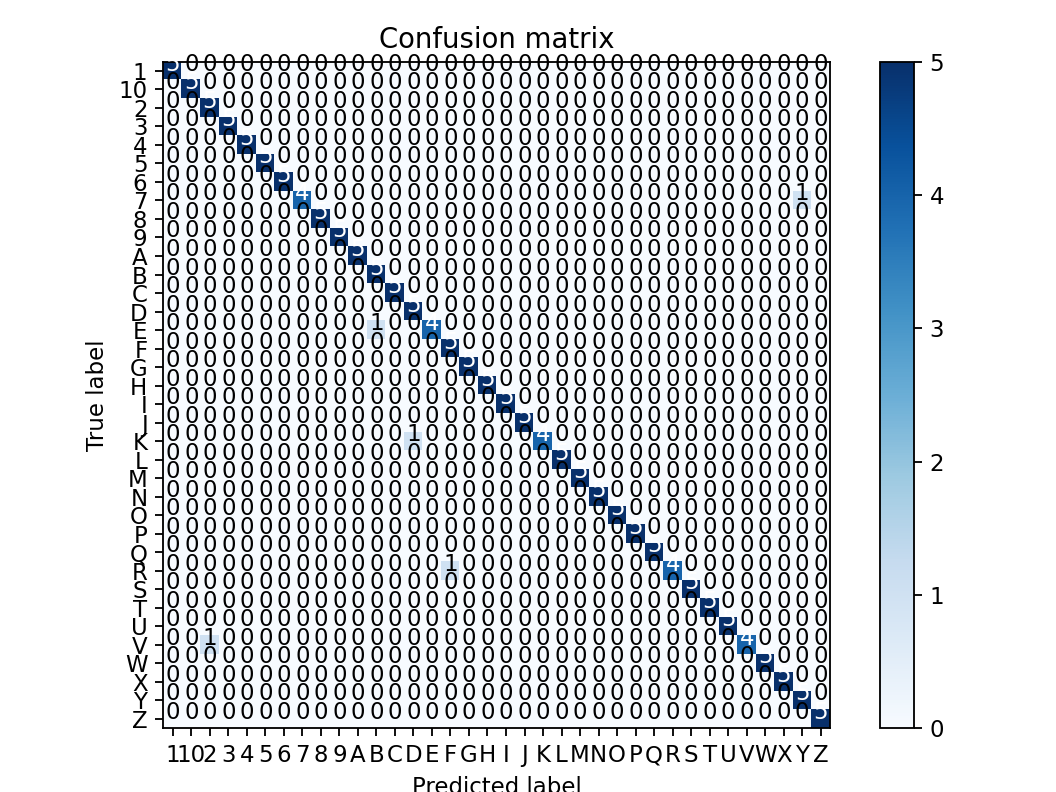

Confusion matrix, without normalization
[[5 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 5]]


In [50]:
plot_confusion_matrix(cm, classes=category, title='Confusion matrix')
plt.show()

In [41]:
model.save('final_model.h5')

In [48]:
plt.savefig('final_confusion_matrix.png')

In [49]:
%matplotlib auto

Using matplotlib backend: nbAgg
